In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
newdata = pd.read_csv("titanic.csv",usecols=['Age','Cabin','Embarked'])
newdata

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [6]:
mean = newdata['Age'].mean()
mean

29.69911764705882

In [7]:
median = newdata['Age'].median()
median

28.0

In [13]:
mode = newdata['Age'].mode()
modeAge = mode[0]

In [14]:
def input_nan(newdata,var,mean,median,mode):
    newdata[var+"_mean"]=newdata[var].fillna(mean)
    newdata[var+"_median"]=newdata[var].fillna(median)
    newdata[var+"_mode"]=newdata[var].fillna(mode)

In [15]:
input_nan(newdata,"Age",mean,median,modeAge)
newdata

,Age,Cabin,Embarked,Age_mean,Age_median,Age_mode
0,22.0,NaN,S,22.000000,22.0,22.0
1,38.0,C85,C,38.000000,38.0,38.0
2,26.0,NaN,S,26.000000,26.0,26.0
3,35.0,C123,S,35.000000,35.0,35.0
4,35.0,NaN,S,35.000000,35.0,35.0
...,...,...,...,...,...,...
886,27.0,NaN,S,27.000000,27.0,27.0
887,19.0,B42,S,19.000000,19.0,19.0
888,NaN,NaN,S,29.699118,28.0,24.0
889,26.0,C148,C,26.000000,26.0,26.0


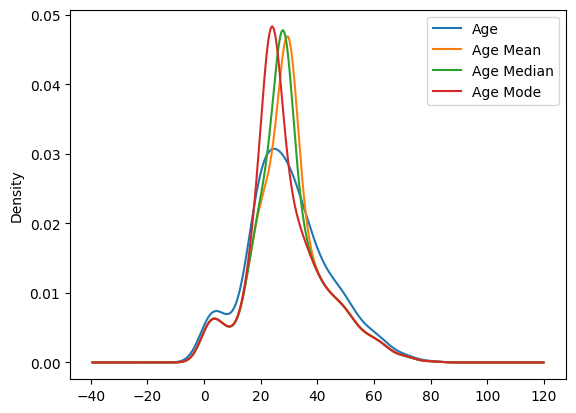

In [24]:
newdata['Age'].plot(kind='kde', label='Age') #kind = kde,
newdata['Age_mean'].plot(kind='kde', label='Age Mean')
newdata['Age_median'].plot(kind='kde', label='Age Median')
newdata['Age_mode'].plot(kind='kde', label='Age Mode')
plt.legend()

In [ ]:
# Sampling

In [34]:
data['Age'].dropna().sample(data['Age'].isnull().sum(),random_state=0) #dropna() removes the null value

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [40]:
 def input_random(data,var):
     data[var+"_random"]=data[var];
     random_sample=data[var].dropna().sample(data[var].isnull().sum(),random_state=0)
     random_sample.index=data[data[var].isnull()].index
     data.loc[data[var].isnull(),var+"_random"]=random_sample
input_random(newdata,'Age')

newdata

,Age,Cabin,Embarked,Age_mean,Age_median,Age_mode,Age_random
0,22.0,NaN,S,22.000000,22.0,22.0,22.0
1,38.0,C85,C,38.000000,38.0,38.0,38.0
2,26.0,NaN,S,26.000000,26.0,26.0,26.0
3,35.0,C123,S,35.000000,35.0,35.0,35.0
4,35.0,NaN,S,35.000000,35.0,35.0,35.0
...,...,...,...,...,...,...,...
886,27.0,NaN,S,27.000000,27.0,27.0,27.0
887,19.0,B42,S,19.000000,19.0,19.0,19.0
888,NaN,NaN,S,29.699118,28.0,24.0,15.0
889,26.0,C148,C,26.000000,26.0,26.0,26.0


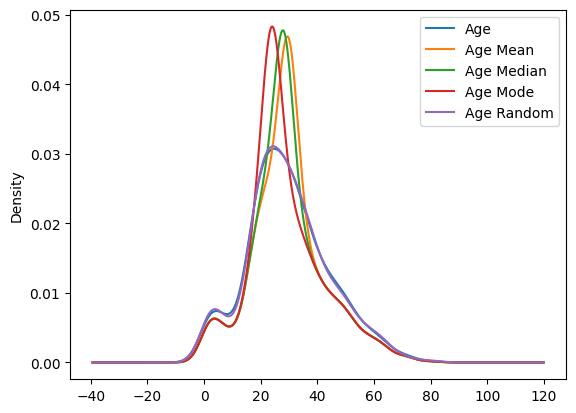

In [41]:
newdata['Age'].plot(kind='kde', label='Age') #kind = kde,
newdata['Age_mean'].plot(kind='kde', label='Age Mean')
newdata['Age_median'].plot(kind='kde', label='Age Median')
newdata['Age_mode'].plot(kind='kde', label='Age Mode')
newdata['Age_random'].plot(kind='kde', label='Age Random')
plt.legend()

In [47]:
def updateCabin(newdata,variable,mode):
    newdata[variable+"_update"]=newdata[variable].fillna(mode)


In [74]:
mode = newdata['Cabin'].mode()
f1 = mode[2]

In [75]:
updateCabin(newdata,"Cabin",f1)

In [76]:
newdata

,Age,Cabin,Embarked,Age_mean,Age_median,Age_mode,Age_random,Cabin_update
0,22.0,NaN,S,22.000000,22.0,22.0,22.0,G6
1,38.0,C85,C,38.000000,38.0,38.0,38.0,C85
2,26.0,NaN,S,26.000000,26.0,26.0,26.0,G6
3,35.0,C123,S,35.000000,35.0,35.0,35.0,C123
4,35.0,NaN,S,35.000000,35.0,35.0,35.0,G6
...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,27.000000,27.0,27.0,27.0,G6
887,19.0,B42,S,19.000000,19.0,19.0,19.0,B42
888,NaN,NaN,S,29.699118,28.0,24.0,15.0,G6
889,26.0,C148,C,26.000000,26.0,26.0,26.0,C148


In [77]:
newdata['Cabin_update'].isnull().sum()

0